In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("D:\Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Preparing the dataset

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [7]:
df.drop([122,123],inplace=True)

In [9]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
df.loc[:122, 'region'] = 0
df.loc[122:, 'region'] = 1

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [13]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:
df.shape

(244, 15)

In [16]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
region         float64
dtype: object

In [17]:
df.drop("Classes",axis=1,inplace=True)

In [18]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [19]:
#There was an anomaly in row 165
df.drop([165],inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0


In [20]:
#converting the datatypes of all columns
df = df.astype('float')

In [21]:
df.dtypes

day            float64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
region         float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  region       243 non-null    float64
dtypes: float64(14)
memory usage: 28.5 KB


In [24]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
df.isnull().sum()
#no null value now

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
dtype: int64

In [26]:
#dropping year cause the year is same
df.drop("year",axis=1,inplace=True)

In [27]:
features = [i.strip() for i in df.columns]
features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region']

In [28]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197


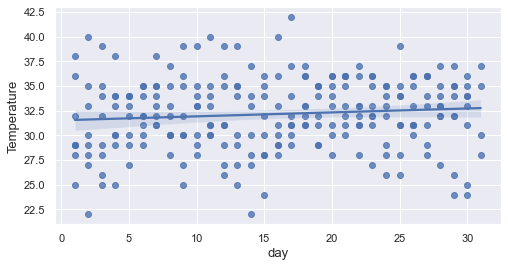

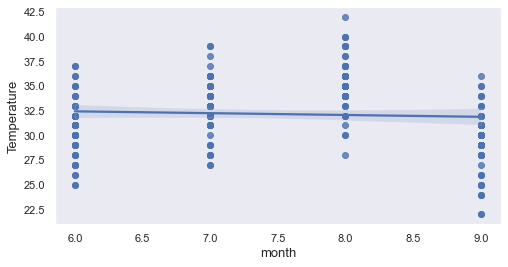

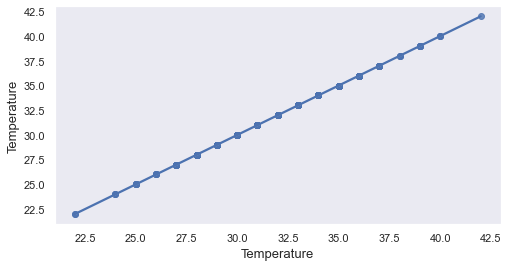

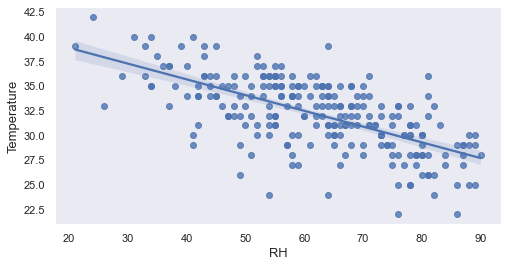

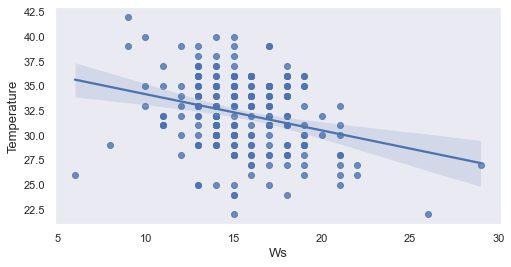

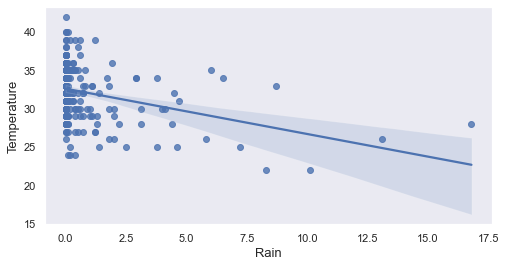

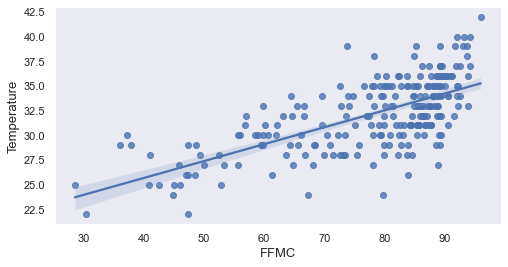

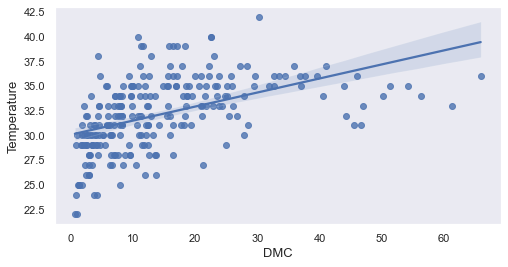

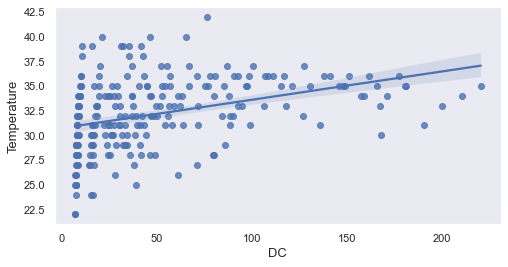

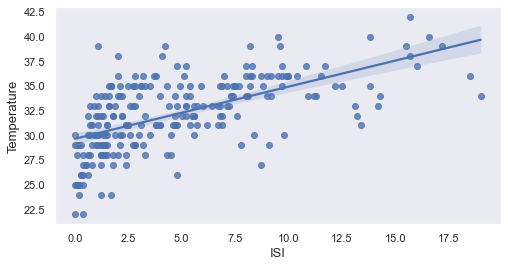

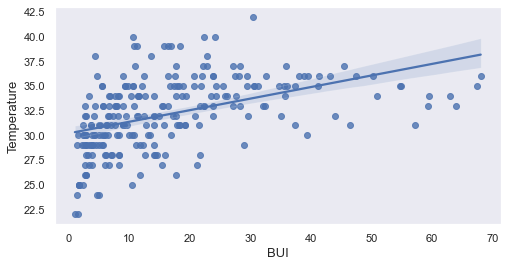

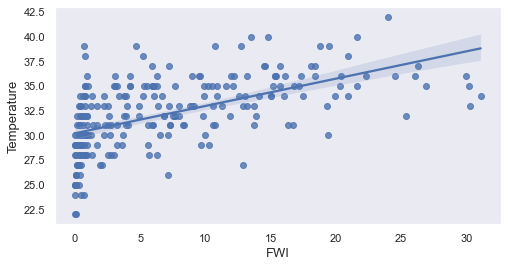

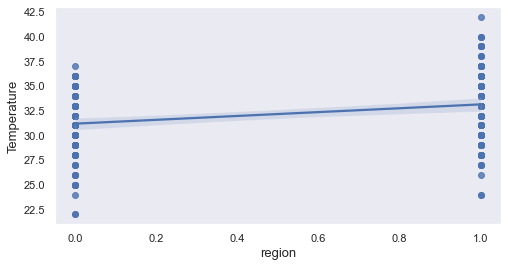

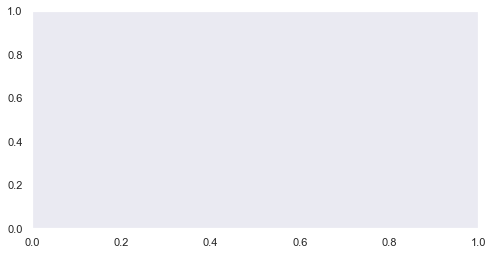

In [29]:
x_axis = features
y_axis = "Temperature"
sns.set(rc={"figure.figsize":(8,4)})
for col in x_axis:
    sns.regplot(x = col, y = y_axis, data = df)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y_axis, fontsize = 13)
    plt.show()
    plt.grid()

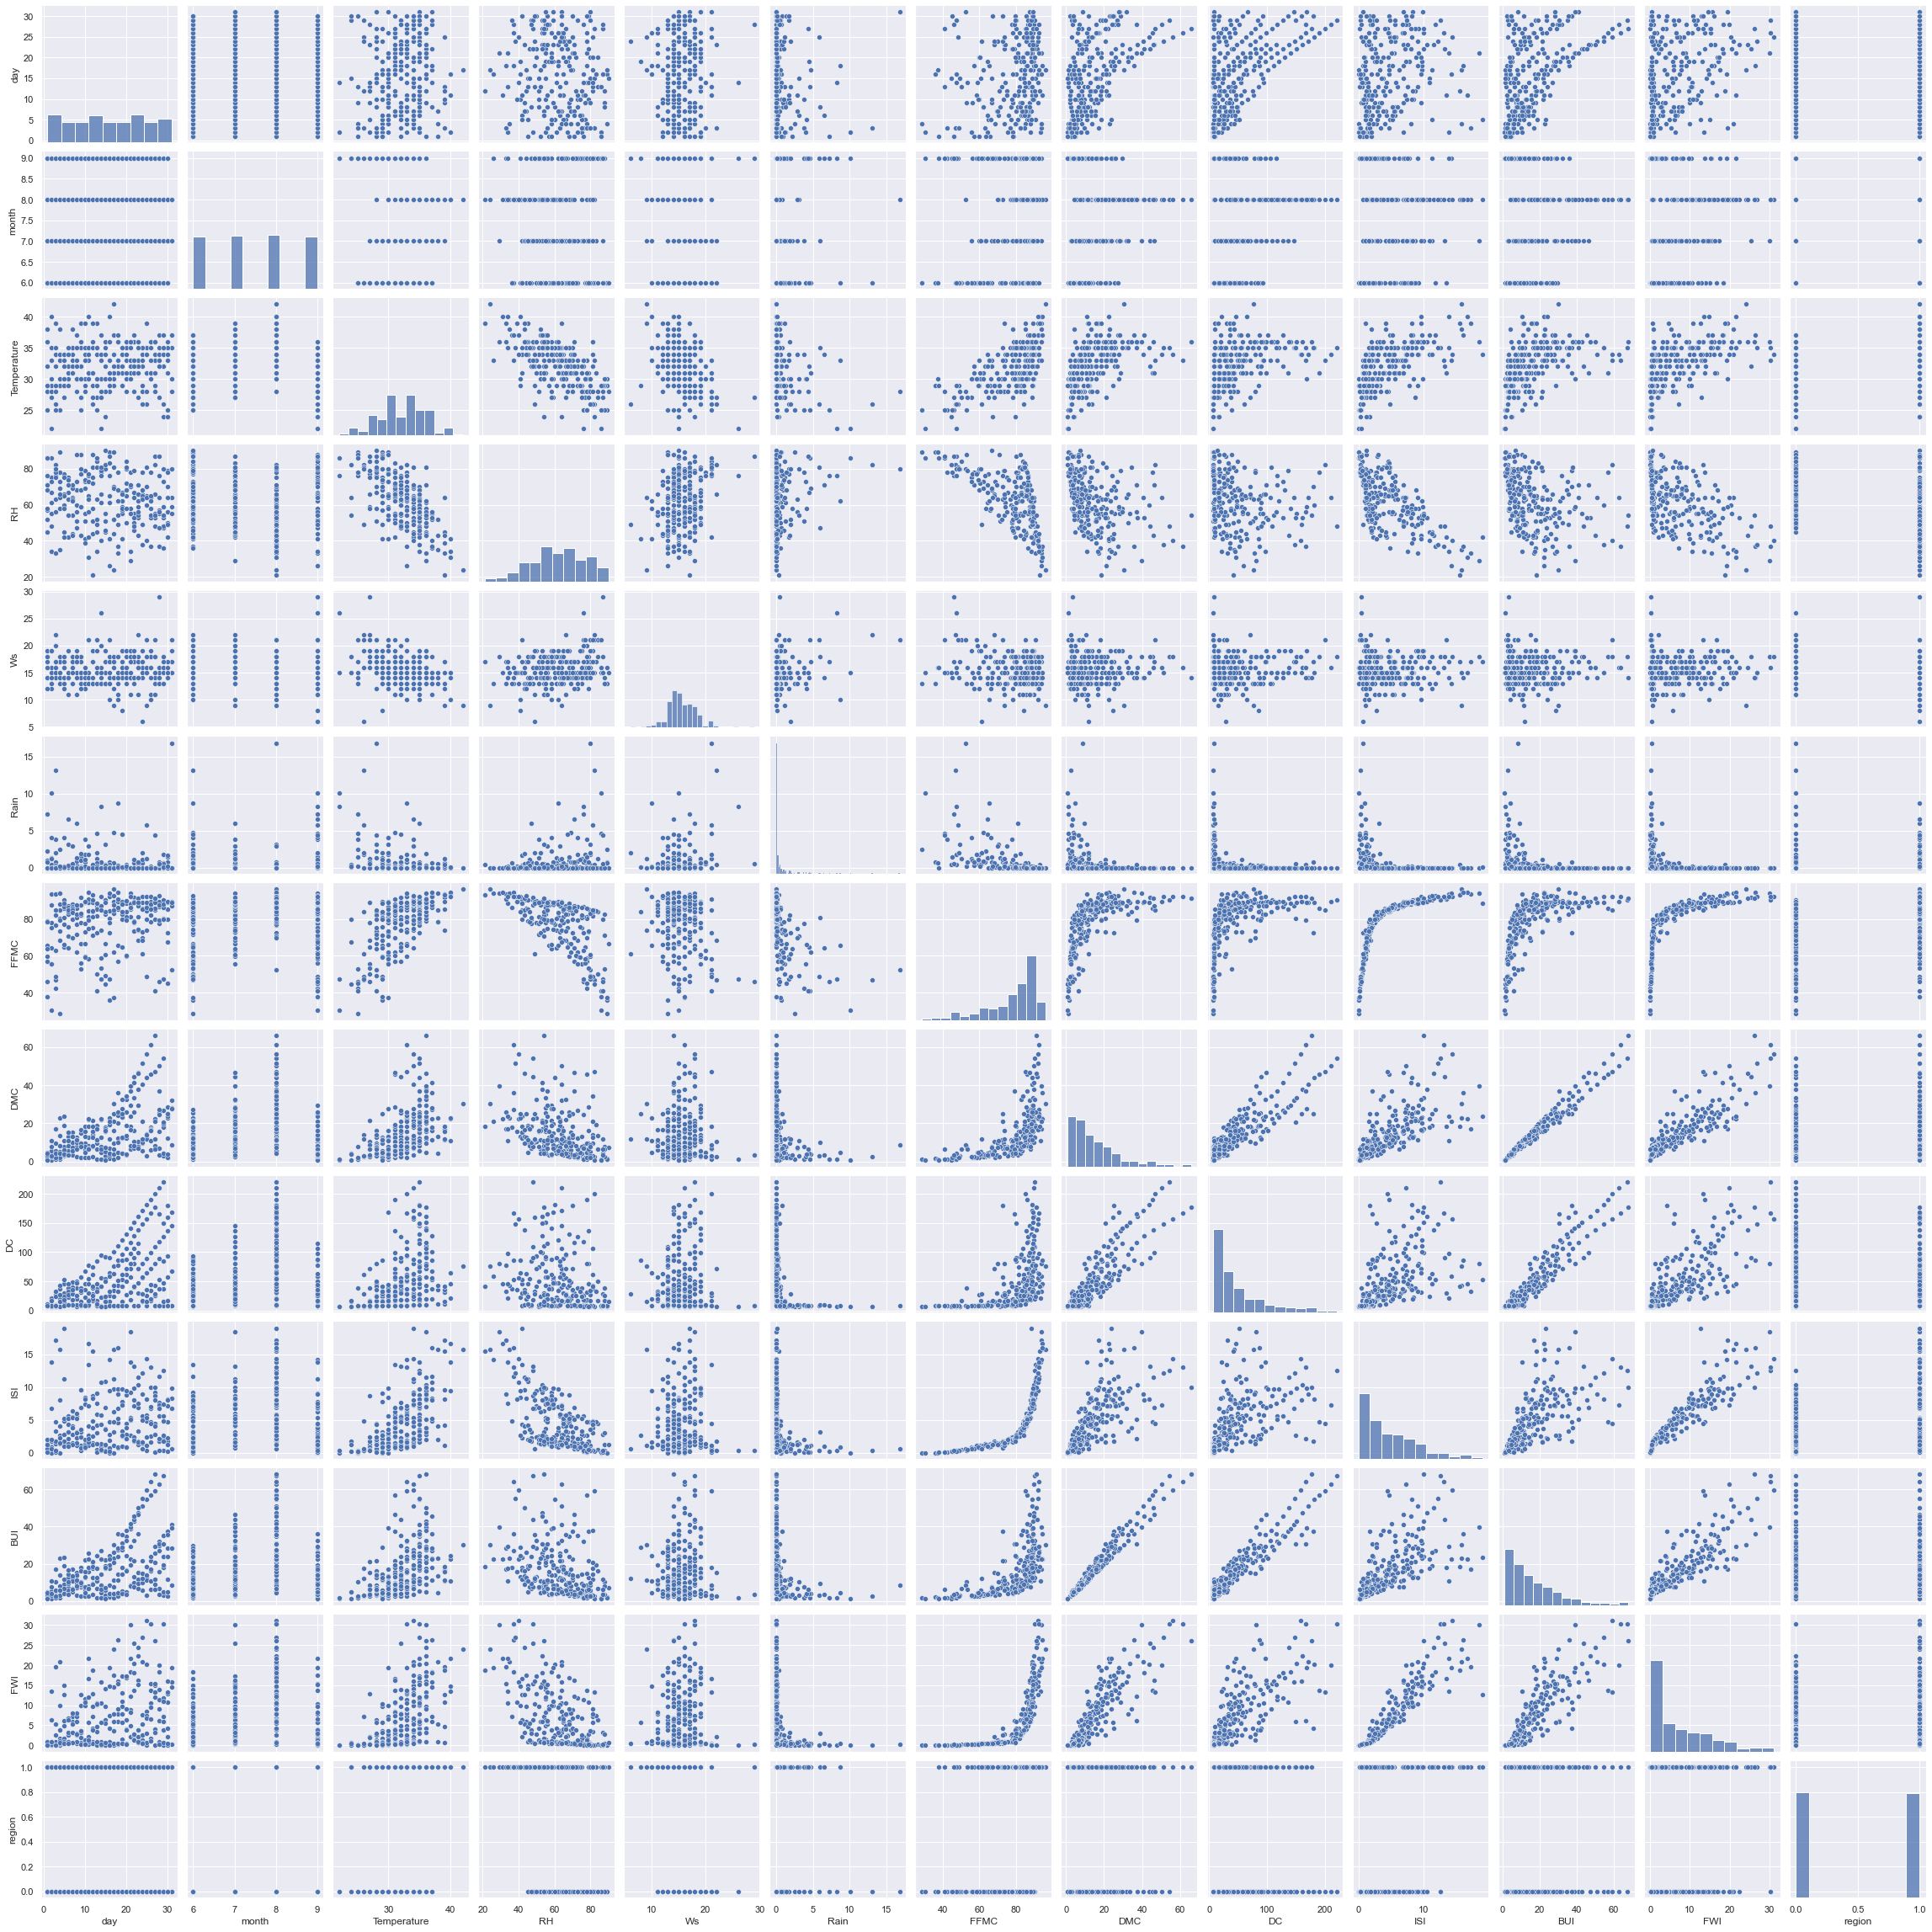

In [30]:
#pairplot
sns.pairplot(df)

<AxesSubplot:>

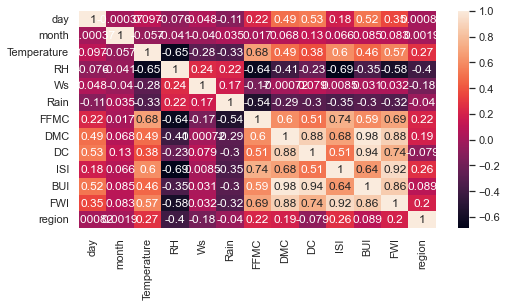

In [31]:
sns.heatmap(df.corr(),annot=True)

# making varibles

In [32]:
X = pd.DataFrame(df , columns=["day","month","RH","Ws","Rain","FFMC","DMC","DC","ISI",'BUI','FWI',"region"])

In [33]:
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27.0,9.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
241,28.0,9.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
242,29.0,9.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [34]:
y = pd.DataFrame(df["Temperature"])

In [36]:
y

,Temperature
0,29.0
1,29.0
2,26.0
3,25.0
4,27.0
...,...
239,30.0
240,28.0
241,27.0
242,24.0


# Train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [39]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
227,14.0,9.0,81.0,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1.0
65,5.0,8.0,65.0,13.0,0.0,86.8,11.1,29.7,5.2,11.5,6.1,0.0
169,18.0,7.0,68.0,15.0,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1.0
207,25.0,8.0,40.0,18.0,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1.0
144,23.0,6.0,59.0,16.0,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,15.0,9.0,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0.0
14,15.0,6.0,80.0,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0.0
92,1.0,9.0,76.0,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0.0
180,29.0,7.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1.0


In [40]:
y_train

,Temperature
227,28.0
65,34.0
169,33.0
207,34.0
144,33.0
...,...
106,24.0
14,28.0
92,25.0
180,34.0


In [41]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
24,25.0,6.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7.0,6.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
152,1.0,7.0,58.0,18.0,2.2,63.7,3.2,8.5,1.2,3.3,0.5,1.0
233,20.0,9.0,58.0,13.0,0.2,79.5,18.7,88.0,2.1,24.4,3.8,1.0
239,26.0,9.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,29.0,9.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0
5,6.0,6.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0
56,27.0,7.0,48.0,13.0,0.0,90.3,22.2,108.5,8.7,29.4,15.3,0.0
124,3.0,6.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1.0


In [42]:
y_test

,Temperature
24,31.0
6,33.0
152,28.0
233,34.0
239,30.0
...,...
242,24.0
5,31.0
56,36.0
124,29.0


# feature scaling or standardize

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler= StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regression = LinearRegression()

In [49]:
regression.fit(X_train,y_train)

LinearRegression()

In [50]:
print(regression.coef_)

[[-0.4753901  -0.15871924 -1.1717492  -0.71166647  0.37349529  1.53346597
   3.54283804  2.52302971  0.29864151 -4.94217301 -0.40398289 -0.09745088]]


In [51]:
print(regression.intercept_)

[32.09876543]


In [52]:
reg_pred = regression.predict(X_test)

In [53]:
reg_pred

array([[32.87339961],
       [35.02800257],
       [30.61644109],
       [33.20791076],
       [32.22849345],
       [32.20862017],
       [31.33937314],
       [35.04562516],
       [31.65371284],
       [31.48323568],
       [28.58887301],
       [39.56919587],
       [34.53710096],
       [34.45654023],
       [34.07192574],
       [32.90344384],
       [33.23060834],
       [25.67337237],
       [32.80505705],
       [34.84924012],
       [30.89561847],
       [28.40749958],
       [33.7290729 ],
       [29.08739995],
       [36.41581507],
       [34.1858573 ],
       [33.49144845],
       [33.6358761 ],
       [26.71675567],
       [33.40134453],
       [29.87047851],
       [32.31815784],
       [32.26909216],
       [33.0263401 ],
       [32.28280411],
       [32.77595593],
       [31.29136814],
       [34.64502901],
       [26.35091687],
       [21.37877807],
       [34.54225865],
       [33.22268399],
       [34.57647649],
       [24.96599091],
       [36.40650988],
       [32

Text(0, 0.5, 'Predicted Data')

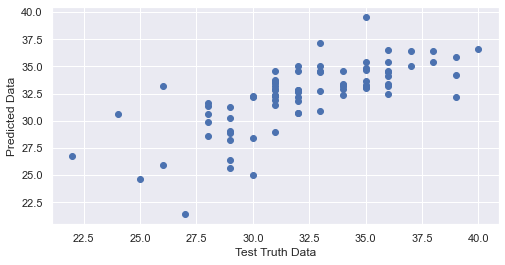

In [54]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [55]:
resudals = y_test-reg_pred

In [56]:
resudals

,Temperature
24,-1.873400
6,-2.028003
152,-2.616441
233,0.792089
239,-2.228493
...,...
242,-6.581137
5,-1.950458
56,0.561977
124,0.780076


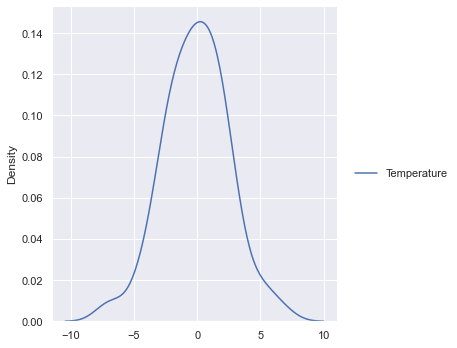

In [58]:
sns.displot(resudals, kind = "kde")

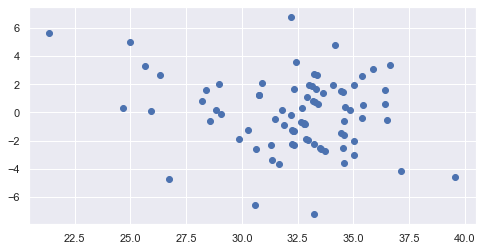

In [59]:
plt.scatter(reg_pred,resudals)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.596268348832718
2.0209884620309446
2.5683201414217653


# performance metrics 

In [64]:
#rsquare
from sklearn.metrics import r2_score
r_score = r2_score(y_test,reg_pred)
print(r_score)

0.48603253246055467


In [66]:
#adjusted rsquare
1 - (1-r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.39533239113006424

# ridge regression

In [71]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [72]:
ridge.fit(X_train, y_train)

Ridge()

In [73]:
print(ridge.coef_)
print(ridge.intercept_)

[[-0.46707971 -0.13949509 -1.17017362 -0.71083333  0.33473415  1.46073641
   0.4794285   0.91028886  0.31915626 -0.4196146  -0.37963579 -0.06139182]]
[32.09876543]


In [74]:
ridge_pred = ridge.predict(X_test)

In [75]:
ridge_pred

array([[32.91020942],
       [34.89508904],
       [30.60593685],
       [33.3643672 ],
       [32.16633371],
       [32.39103653],
       [31.34686178],
       [34.99727792],
       [31.65387866],
       [31.51454027],
       [28.57773008],
       [34.76636954],
       [34.55421134],
       [34.34135005],
       [34.29774198],
       [32.97490211],
       [33.20025978],
       [25.7994448 ],
       [32.6997241 ],
       [34.78563142],
       [30.85338864],
       [28.26975695],
       [33.71368824],
       [29.08626495],
       [36.5913082 ],
       [34.456563  ],
       [33.46243034],
       [33.72365314],
       [26.67055304],
       [33.26636978],
       [29.90153774],
       [32.29433157],
       [32.20949184],
       [33.20830397],
       [32.21569287],
       [32.73322741],
       [31.20408732],
       [34.65489875],
       [26.4708583 ],
       [21.53090287],
       [34.46116124],
       [33.11448555],
       [34.57503938],
       [25.04300416],
       [36.13036161],
       [32

Text(0, 0.5, 'Predicted Data')

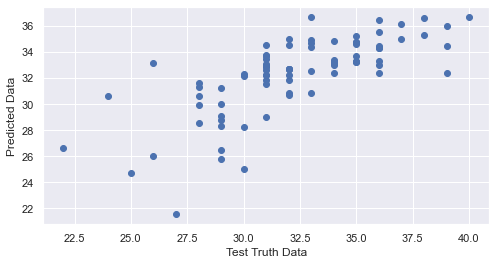

In [76]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [78]:
ridge_resudals = y_test-ridge_pred

In [79]:
ridge_resudals

,Temperature
24,-1.910209
6,-1.895089
152,-2.605937
233,0.635633
239,-2.166334
...,...
242,-6.656400
5,-1.872355
56,0.470295
124,0.677216


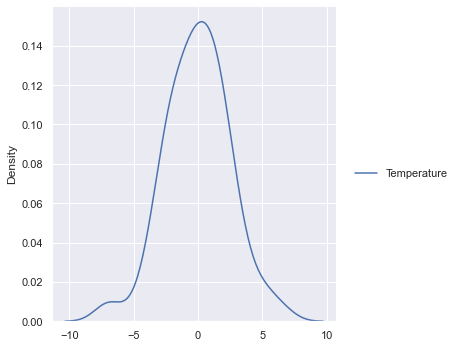

In [80]:
sns.displot(ridge_resudals, kind = "kde")

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.182846059027795
1.9462810686253715
2.48653293946165


In [83]:
#rsquare
from sklearn.metrics import r2_score
ridge_r_score = r2_score(y_test,ridge_pred)
print(ridge_r_score)

0.5182455347337258


In [84]:
#adjusted rsquare
1 - (1-ridge_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43323004086320693

# lasso model 

In [85]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [86]:
lasso.fit(X_train, y_train)

Lasso()

In [87]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.          0.         -0.71322387 -0.         -0.          1.0466751
  0.          0.          0.          0.          0.          0.        ]
[32.09876543]


In [88]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([32.71498993, 33.30413649, 31.30001437, 32.46912413, 32.57098185,
       31.76046361, 31.85604499, 34.01682715, 30.99883434, 32.72585794,
       31.09788431, 32.54255687, 33.48458018, 33.62118884, 33.32291584,
       32.65584414, 31.55276769, 27.7754911 , 32.16682101, 32.9711622 ,
       31.55721045, 29.95949536, 33.36277038, 30.54068094, 34.62699925,
       33.51249324, 32.50438699, 32.78500373, 27.50456962, 33.09807559,
       31.54409624, 31.47760066, 32.72238936, 32.75198708, 32.64216839,
       32.19590681, 31.75245299, 33.36848516, 28.70725759, 28.59626616,
       32.82715411, 32.8453719 , 33.22672327, 27.86428425, 34.24733254,
       32.46111351, 31.74673821, 31.03644268, 33.26030147, 31.30567951,
       34.41297737, 33.59332541, 34.05550894, 32.87777737, 33.4259463 ,
       31.9789779 , 32.216982  , 33.10889395, 32.14748011, 34.48584856,
       32.94952546, 31.43029706, 30.37161718, 34.84785902, 32.19590681,
       32.84710619, 33.0058635 , 33.546633  , 34.26784618, 28.27

Text(0, 0.5, 'Predicted Data')

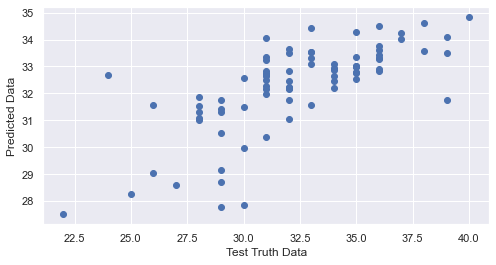

In [89]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [115]:
lasso_resudals = y_test-ridge_pred
lasso_resudals

,Temperature
24,-1.910209
6,-1.895089
152,-2.605937
233,0.635633
239,-2.166334
...,...
242,-6.656400
5,-1.872355
56,0.470295
124,0.677216


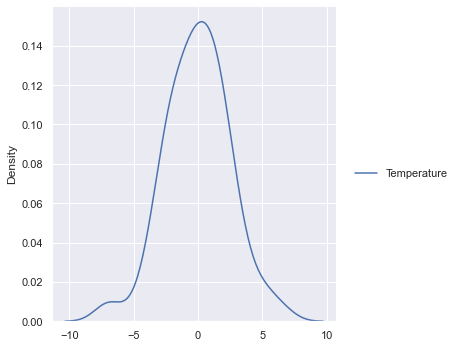

In [99]:
sns.displot(lasso_resudals, kind = "kde")

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

7.177068723026321
2.144527529507031
2.6790051741320546


In [101]:
#rsquare
from sklearn.metrics import r2_score
lasso_r_score = r2_score(y_test,lasso_pred)
print(lasso_r_score)

0.44077777906304116


In [102]:
#adjusted rsquare
1 - (1-lasso_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.34209150478004846

# elastic net 

In [103]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)

ElasticNet()

In [104]:
print(elastic_net.coef_)
print(elastic_net.intercept_)

[-0.         -0.         -0.67552277 -0.20430997 -0.          0.75462677
  0.08978222  0.          0.25151929  0.06182527  0.16908884  0.        ]
[32.09876543]


In [105]:
elastic_net_pred = elastic_net.predict(X_test)

In [109]:
elastic_net_pred

array([32.65210982, 33.29485698, 30.89330823, 32.44216561, 32.51078566,
       31.94985895, 31.45050596, 33.99390192, 31.0112848 , 32.14030827,
       30.33545571, 32.64051658, 33.61333067, 33.9794798 , 33.6943707 ,
       32.21688729, 32.1632191 , 28.30990683, 32.12665541, 32.9124761 ,
       31.07285174, 29.83345569, 33.20395804, 30.14558763, 35.27612402,
       33.36994818, 32.38556   , 32.82229232, 27.98026278, 32.9049159 ,
       31.2290138 , 31.48155988, 32.56867886, 32.96209401, 32.16100644,
       31.9042827 , 31.31880758, 33.30394988, 28.88680056, 27.72546883,
       32.84874864, 32.72722963, 33.42900928, 28.13430838, 34.69880349,
       32.32143614, 31.5997531 , 30.95005601, 33.39231772, 30.79192715,
       35.50864584, 33.47814656, 34.0443136 , 33.62570094, 33.41564373,
       32.17010958, 31.88008021, 33.00485792, 31.9474772 , 34.88379963,
       32.56084072, 30.80974257, 30.36144184, 35.54059591, 31.7215588 ,
       32.52317257, 32.86531534, 33.28088064, 34.18388685, 28.08

Text(0, 0.5, 'Predicted Data')

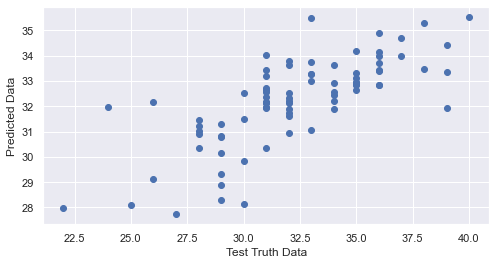

In [106]:
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [121]:
#here i got a error ValueError: Unable to coerce to Series, length must be 1: given 81 so i changed its shape 
elastic_net_pred = elastic_net_pred.reshape(81,1)

In [123]:
elastic_net_resudial = y_test-elastic_net_pred

In [124]:
elastic_net_resudial

,Temperature
24,-1.652110
6,-0.294857
152,-2.893308
233,1.557834
239,-2.510786
...,...
242,-7.976408
5,-0.991631
56,1.850951
124,-0.336701


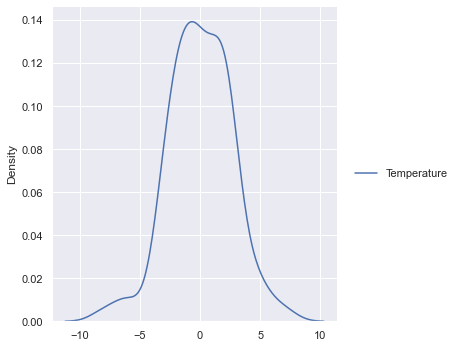

In [125]:
sns.displot(elastic_net_resudial,kind="kde")

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

6.650821290264138
2.0377628162152064
2.578918628081184


In [127]:
#rsquare
from sklearn.metrics import r2_score
elastic_net_r_score = r2_score(y_test,elastic_net_pred)
print(elastic_net_r_score)

0.48178188108138564


In [128]:
#adjusted rsquare
1 - (1-elastic_net_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3903316248016301